In [ ]:
# Importing necessary libraries

import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [84]:
# Loading the dataset

data = pd.read_csv("D:\Jaydeep\Internships\Current Internship\Task 4\Iris.csv")
data.drop("Id", axis = 1, inplace = True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [86]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


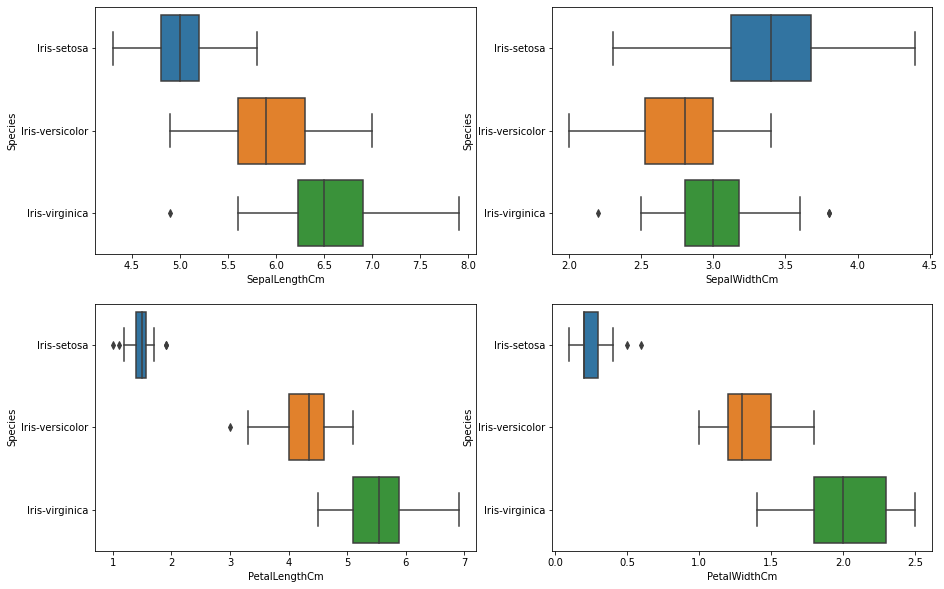

In [88]:
# Class Distribution

figure, axes = plt.subplots(2, 2, figsize = (15, 10))
axes = axes.flatten()
for ax, col in zip(axes, data.columns):
    sb.boxplot(x = col, y = "Species", data = data, ax = ax)
    ax.set_xlabel(col)
plt.show()

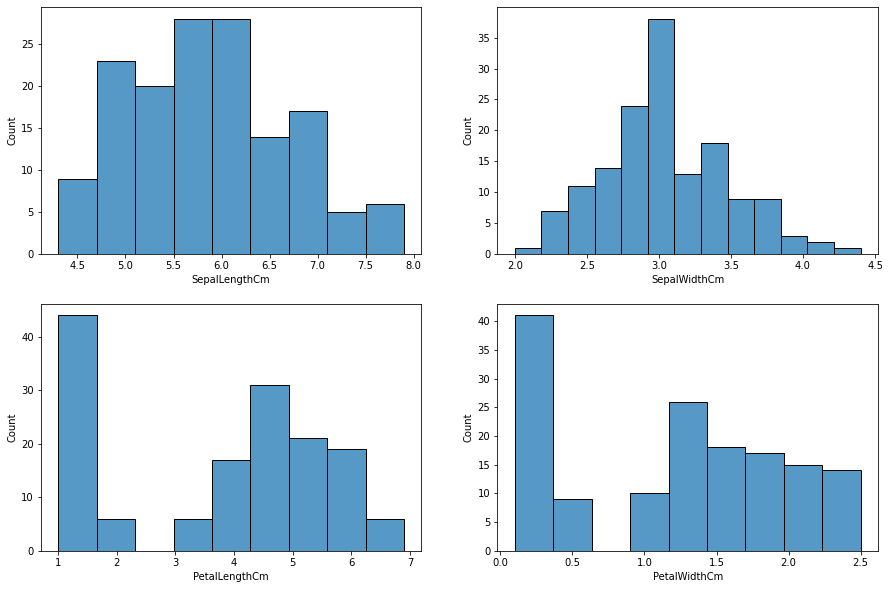

In [89]:
# Visualization

figure, axes = plt.subplots(2, 2, figsize = (15, 10))
axes = axes.flatten()

for ax, col in zip(axes, data.columns):
    sb.histplot(data[col], ax = ax)
    ax.set_xlabel(col)
plt.show()

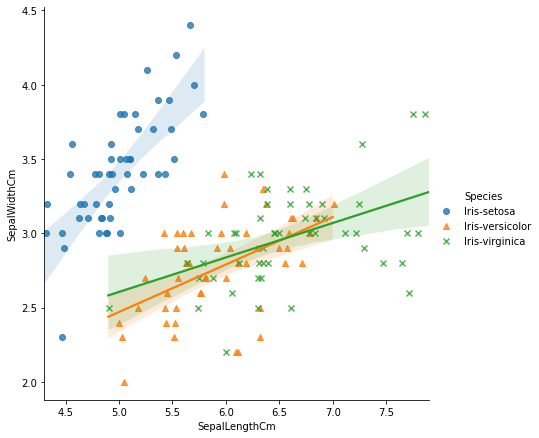

In [59]:
# Visualization

np.warnings.filterwarnings('ignore')
sb.lmplot(x = "SepalLengthCm", y = "SepalWidthCm", hue = "Species", data = data, height = 6, markers = ["o", "^", "x"], x_jitter=.1);

In [60]:
# Splitting dataset

y = data["Species"]
x = data.drop(["Species"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

print(x.head())
print(y.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [63]:
# Visualizing Train and Test data

print(x_train.head())
print(x_test.head())
print(y_train.head())
print(y_test.head())

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
81             5.5           2.4            3.7           1.0
133            6.3           2.8            5.1           1.5
137            6.4           3.1            5.5           1.8
75             6.6           3.0            4.4           1.4
109            7.2           3.6            6.1           2.5
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
73             6.1           2.8            4.7           1.2
18             5.7           3.8            1.7           0.3
118            7.7           2.6            6.9           2.3
78             6.0           2.9            4.5           1.5
76             6.8           2.8            4.8           1.4
81     Iris-versicolor
133     Iris-virginica
137     Iris-virginica
75     Iris-versicolor
109     Iris-virginica
Name: Species, dtype: object
73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicol

In [61]:
# Grid Search and Matrix

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

print("Train score: {}".format(model.score(x_train, y_train)))
print("Test score: {}".format(model.score(x_test, y_test)))
pred = model.predict(x_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

Train score: 1.0
Test score: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [35]:
# Defining Decision Tree Algorithm

dt = DecisionTreeClassifier(random_state = 43)
dt.fit(x_train, y_train)

print("Decision Tree Classifier Created")

Decision Tree Classifier Created


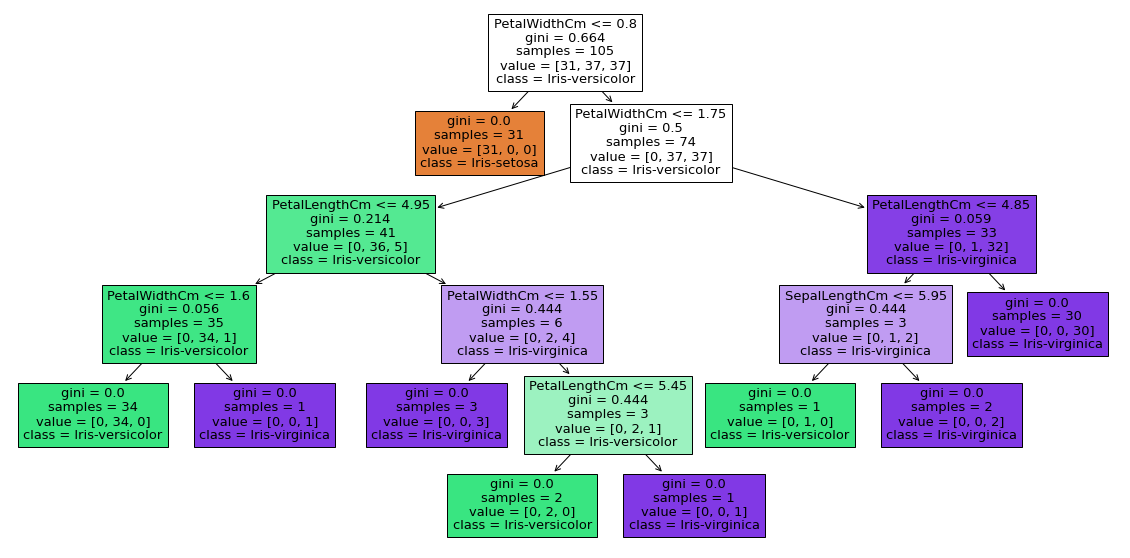

In [90]:
# Decision Tree Graph

from sklearn.tree import plot_tree

plt.figure(figsize = (20, 10))
plot_tree(model, feature_names = [i for i in data.columns if i !='Species'], class_names = data['Species'].unique(), filled = True);